# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

/home/apprenant/miniconda3/envs/mlrecap_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#df = pd.read_csv("../data/bronze.csv", delimiter=";")
df = pd.read_csv("../data/bronze_data.csv", delimiter=";")
df.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


Description du fichier

    Date - Heure: date_heure[datetime]
    Date: date[date]
    Heure: heure[text]
    Code INSEE région: code_insee_region[text]
    Région: region[text]
    Consommation brute gaz (MW PCS 0°C) - GRTgaz: consommation_brute_gaz_grtgaz[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre GRTgaz
    Statut - GRTgaz: statut_grtgaz[text]
    Consommation brute gaz (MW PCS 0°C) - Teréga: consommation_brute_gaz_terega[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre Teréga
    Statut - Teréga: statut_terega[text]
    Consommation brute gaz totale (MW PCS 0°C): consommation_brute_gaz_totale[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C
    Consommation brute électricité (MW) - RTE: consommation_brute_electricite_rte[int] Consommation brute régionale d’électricité au pas 30 minutes en MW
    Statut - RTE: statut_rte[text]
    Consommation brute totale (MW): consommation_brute_totale[int] Consommation brute régionale totale au pas horaire en MW


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207796 entries, 0 to 2207795
Data columns (total 13 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   date_heure                          object 
 1   date                                object 
 2   heure                               object 
 3   code_insee_region                   int64  
 4   region                              object 
 5   consommation_brute_gaz_grtgaz       float64
 6   statut_grtgaz                       object 
 7   consommation_brute_gaz_terega       float64
 8   statut_terega                       object 
 9   consommation_brute_gaz_totale       float64
 10  consommation_brute_electricite_rte  int64  
 11  statut_rte                          object 
 12  consommation_brute_totale           float64
dtypes: float64(4), int64(2), object(7)
memory usage: 219.0+ MB


In [5]:
df.shape

(2207796, 13)

In [6]:
# Convertir la colonne "date_heure" en un objet datetime
df['date_heure'] = pd.to_datetime(df['date_heure'])

In [7]:
# Convertir la colonne "date_heure" en un objet datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.isnull().sum()

date_heure                                  0
date                                        0
heure                                       0
code_insee_region                           0
region                                      0
consommation_brute_gaz_grtgaz         1121532
statut_grtgaz                         1103964
consommation_brute_gaz_terega         1931823
statut_terega                         1931822
consommation_brute_gaz_totale         1121533
consommation_brute_electricite_rte          0
statut_rte                                  0
consommation_brute_totale             1121533
dtype: int64

In [9]:
df['consommation_brute_gaz_grtgaz'].interpolate(method='linear', inplace=True)

In [10]:
df['consommation_brute_gaz_totale'].interpolate(method='linear', inplace=True)


In [11]:
df['consommation_brute_gaz_terega'].interpolate(method='linear', inplace=True)


In [12]:
df['consommation_brute_totale'].interpolate(method='linear', inplace=True)

In [13]:
df.isnull().sum()

date_heure                                  0
date                                        0
heure                                       0
code_insee_region                           0
region                                      0
consommation_brute_gaz_grtgaz               0
statut_grtgaz                         1103964
consommation_brute_gaz_terega               3
statut_terega                         1931822
consommation_brute_gaz_totale               0
consommation_brute_electricite_rte          0
statut_rte                                  0
consommation_brute_totale                   0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000


In [15]:
df.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21 09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21 09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21 09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21 09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21 09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


### 1) A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

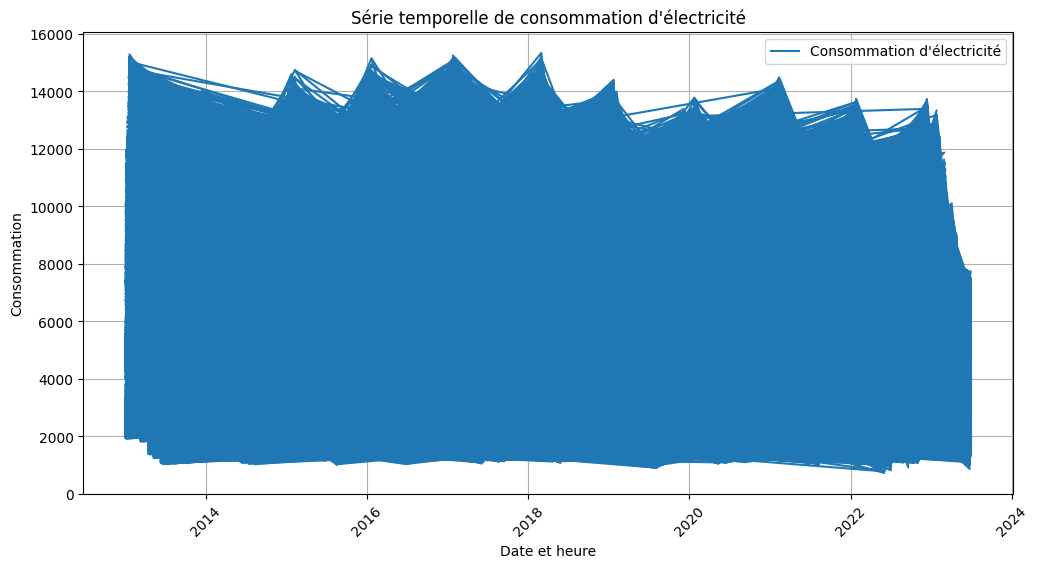

In [16]:
import matplotlib.pyplot as plt

# Créez le graphique de la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(df['date_heure'], df['consommation_brute_electricite_rte'], label='Consommation d\'électricité')
plt.xlabel('Date et heure')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d\'électricité')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 2) Affichez cette même série temporelle en rassemblant:
Par année
Par trimestre
Par mois
Par semaine
Par jour


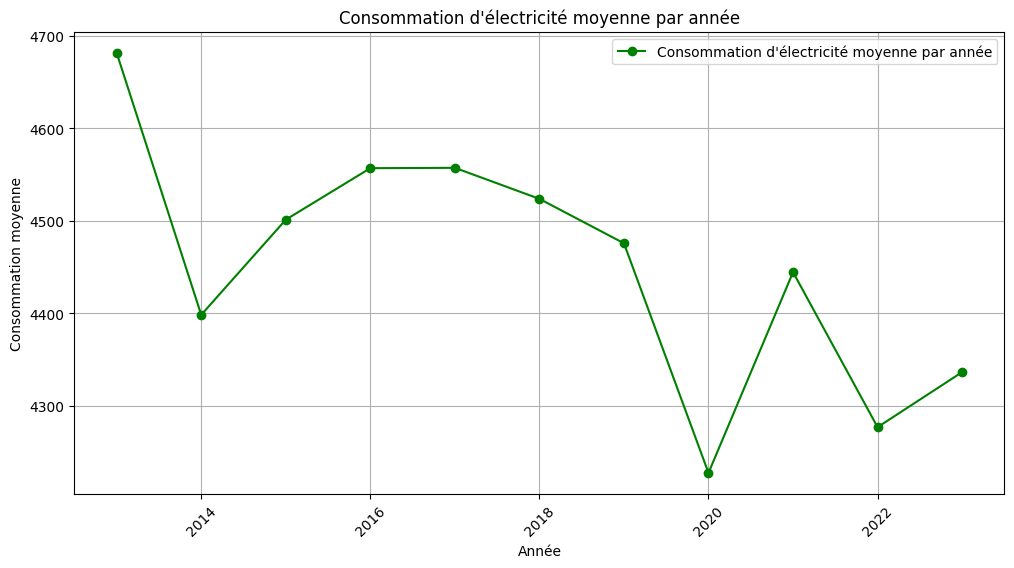

In [17]:
# Créez un nouveau DataFrame avec la consommation moyenne par année
df_avg_by_year = df.groupby(df['date'].dt.year)['consommation_brute_electricite_rte'].mean().reset_index()

# Créez le graphique de la consommation moyenne par année
plt.figure(figsize=(12, 6))
plt.plot(df_avg_by_year['date'], df_avg_by_year['consommation_brute_electricite_rte'], label='Consommation d\'électricité moyenne par année', marker='o', linestyle='-', color='g')
plt.xlabel('Année')
plt.ylabel('Consommation moyenne')
plt.title('Consommation d\'électricité moyenne par année')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

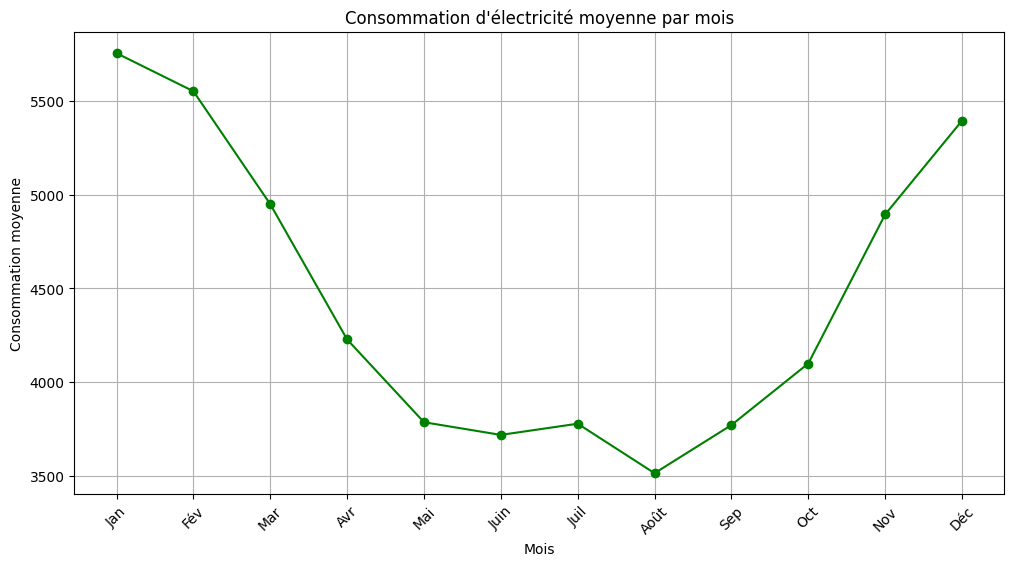

In [18]:
# Créez un nouveau DataFrame avec la consommation moyenne par mois
df['mois'] = df['date'].dt.month
df_avg_by_month = df.groupby('mois')['consommation_brute_electricite_rte'].mean().reset_index()

# Créez le graphique de la consommation moyenne par mois
mois_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
plt.figure(figsize=(12, 6))
plt.plot(mois_labels, df_avg_by_month['consommation_brute_electricite_rte'], marker='o', linestyle='-', color='g')
plt.xlabel('Mois')
plt.ylabel('Consommation moyenne')
plt.title('Consommation d\'électricité moyenne par mois')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


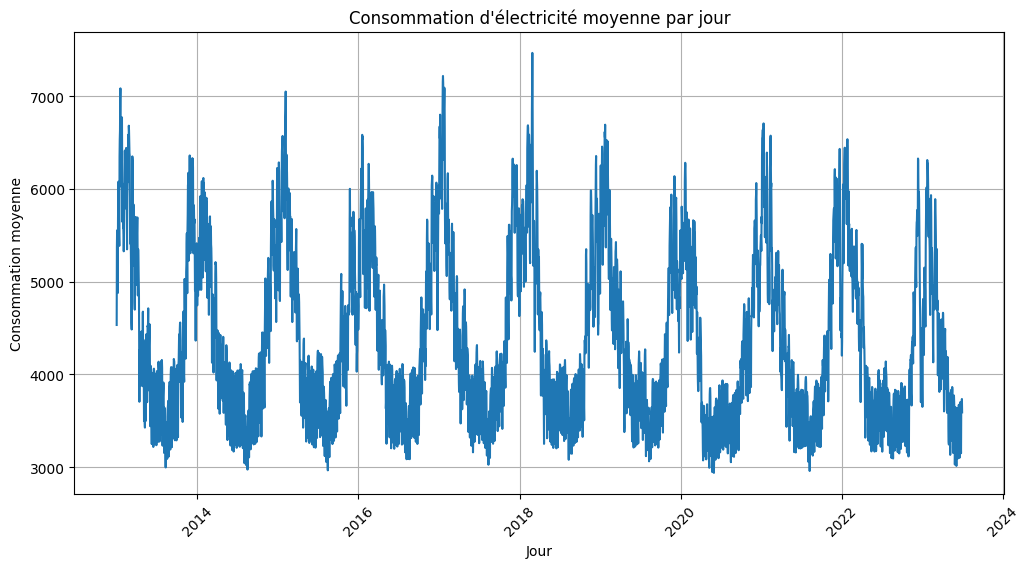

In [19]:
# Créez un nouveau DataFrame avec la consommation moyenne par jour
df['jour'] = df['date'].dt.date
df_avg_by_day = df.groupby('jour')['consommation_brute_electricite_rte'].mean().reset_index()

# Créez le graphique de la consommation moyenne par jour
plt.figure(figsize=(12, 6))
plt.plot(df_avg_by_day['jour'], df_avg_by_day['consommation_brute_electricite_rte'])
plt.xlabel('Jour')
plt.ylabel('Consommation moyenne')
plt.title('Consommation d\'électricité moyenne par jour')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [20]:
df.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale,mois,jour
0,2013-01-21 09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0,1,2013-01-21
1,2013-01-21 09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0,1,2013-01-21
2,2013-01-21 09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0,1,2013-01-21
3,2013-01-21 09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0,1,2013-01-21
4,2013-01-21 09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0,1,2013-01-21


In [21]:
df.dtypes

date_heure                                    object
date                                  datetime64[ns]
heure                                         object
code_insee_region                              int64
region                                        object
consommation_brute_gaz_grtgaz                float64
statut_grtgaz                                 object
consommation_brute_gaz_terega                float64
statut_terega                                 object
consommation_brute_gaz_totale                float64
consommation_brute_electricite_rte             int64
statut_rte                                    object
consommation_brute_totale                    float64
mois                                           int64
jour                                          object
dtype: object

/tmp/ipykernel_14640/3320988233.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = df.resample('W').mean()


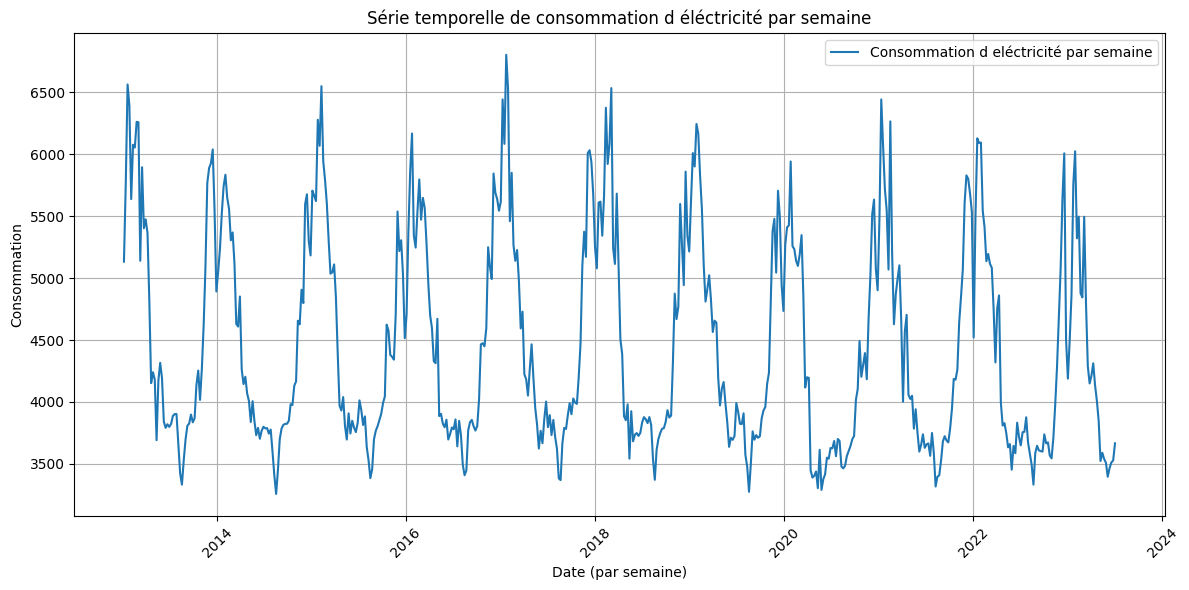

In [22]:
# Définir la colonne "date_heure" comme index
df.set_index('date', inplace=True)


# Définir la fréquence d'échantillonnage par semaine
weekly_data = df.resample('W').mean()

# Créer le graphique pour la consommation de gaz par semaine
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['consommation_brute_electricite_rte'], label='Consommation d eléctricité par semaine')
plt.xlabel('Date (par semaine)')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d éléctricité par semaine')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique par semaine
plt.tight_layout()
plt.show()

/tmp/ipykernel_14640/2412363437.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_data = df.resample('Q').mean()


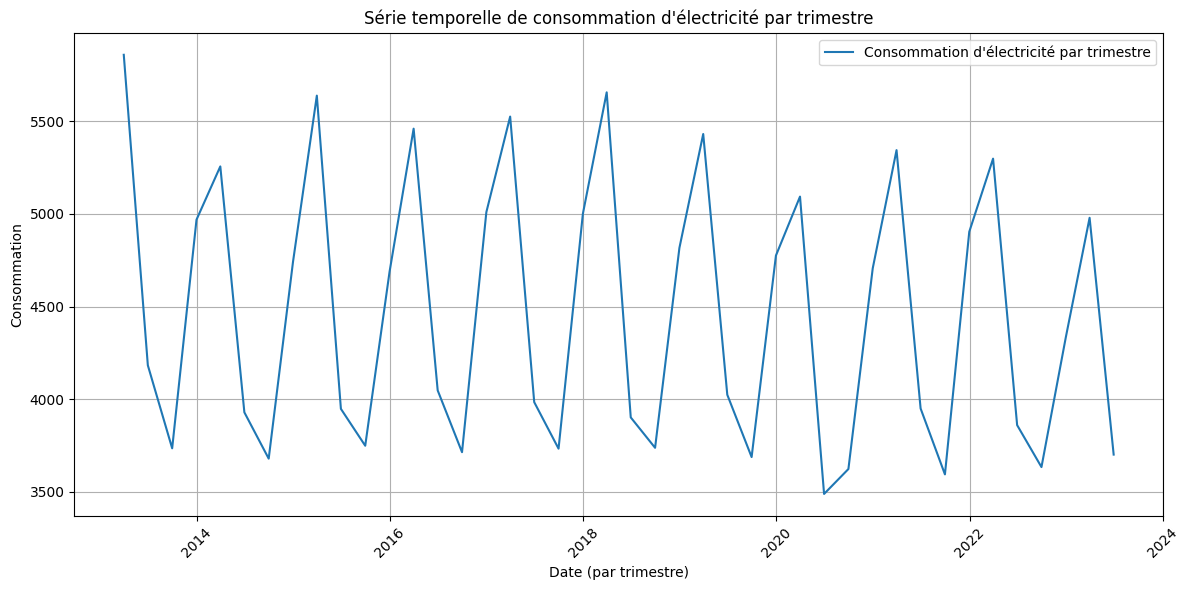

In [23]:

# Définir la fréquence d'échantillonnage par trimestre (3 mois)
quarterly_data = df.resample('Q').mean()

# Créer le graphique pour la consommation d'électricité par trimestre
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['consommation_brute_electricite_rte'], label='Consommation d\'électricité par trimestre')
plt.xlabel('Date (par trimestre)')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d\'électricité par trimestre')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique par trimestre
plt.tight_layout()
plt.show()

### 3) A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

/tmp/ipykernel_14640/3925491282.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = df.resample('w').mean()


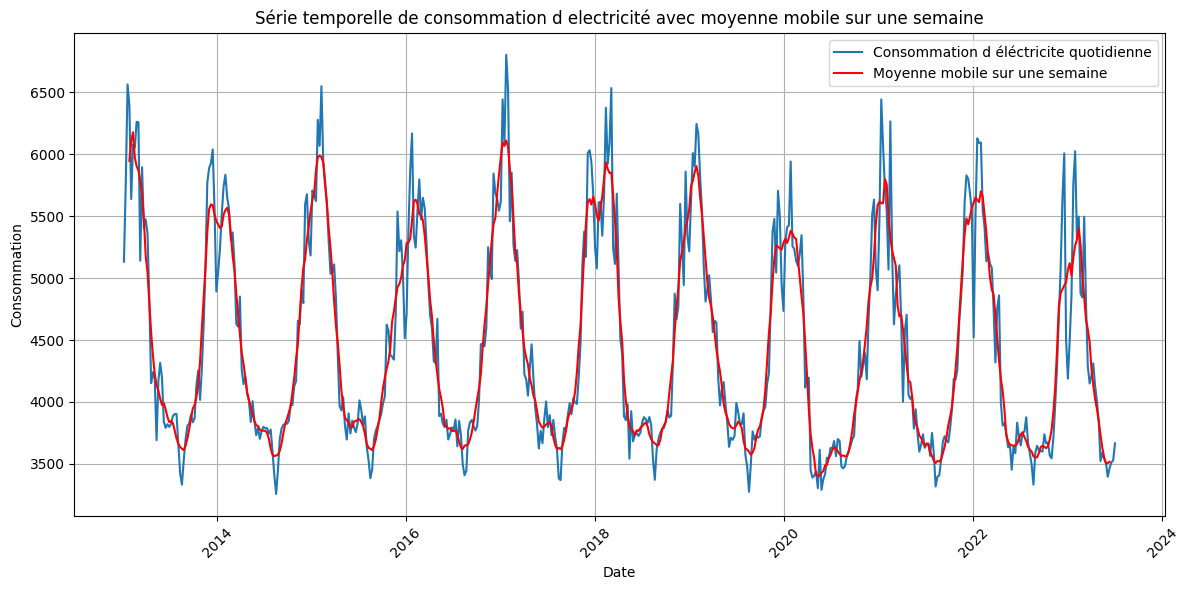

In [24]:
# Définir la fréquence d'échantillonnage par jour
daily_data = df.resample('w').mean()

# Calculer la moyenne mobile sur une semaine centrée et symétrique
rolling_weekly_mean = daily_data['consommation_brute_electricite_rte'].rolling(window=7, center=True).mean()

# Créer le graphique pour la moyenne mobile
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['consommation_brute_electricite_rte'], label='Consommation d éléctricite quotidienne')
plt.plot(rolling_weekly_mean.index, rolling_weekly_mean, label='Moyenne mobile sur une semaine', color='red')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d electricité avec moyenne mobile sur une semaine')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique avec la moyenne mobile
plt.tight_layout()
plt.show()


### 4) Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

La principale différence entre la moyenne mobile et les agrégations précédentes (comme l'agrégation quotidienne ou trimestrielle) réside dans la manière dont elles traitent les données temporelles et l'objectif de chacune d'elles :

    Agrégations (quotidiennes, trimestrielles, etc.) :
        Les agrégations consistent à regrouper les données sur une période de temps donnée (par exemple, par jour, par trimestre) et à effectuer une opération (telle que la moyenne, la somme, etc.) sur les valeurs de cette période.
        Elles réduisent la résolution temporelle des données, ce qui signifie que vous obtenez une vue d'ensemble sur des périodes plus longues, ce qui peut aider à détecter des tendances à plus long terme.
        Cependant, elles ne lissent pas nécessairement les fluctuations à court terme. Les variations à court terme sont toujours visibles dans les données agrégées.

    Moyenne Mobile :
        La moyenne mobile consiste à calculer la moyenne des données sur une fenêtre de temps glissante. La fenêtre de temps est centrée autour de chaque point de données, de sorte qu'elle lisse les fluctuations à court terme.
        Elle est utilisée pour atténuer le bruit et mettre en évidence les tendances à moyen terme dans les données.
        La moyenne mobile est particulièrement utile pour identifier des modèles de variation à moyen terme et pour rendre les données plus lisses et plus faciles à interpréter.

En résumé, les agrégations sont principalement utilisées pour réduire la résolution temporelle des données et obtenir une vue d'ensemble sur des périodes plus longues, tandis que la moyenne mobile est utilisée pour lisser les données en atténuant les fluctuations à court terme et en mettant en évidence les tendances à moyen terme. Le choix entre les deux dépend de l'objectif de votre analyse et de la façon dont vous souhaitez interpréter les données temporelles.

### 5) A l’aide de box-plots, observez la saisonnalité:
trimestrielle (chaque trimestre)
mensuelle (chaque mois)
hebdomadaire (chaque jour)
journalière (chaque heure)


In [25]:
df.head()

,date_heure,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale,mois,jour
date,,,,,,,,,,,,,,
2013-01-21,2013-01-21 09:00:00+01:00,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0,1,2013-01-21
2013-01-21,2013-01-21 09:00:00+01:00,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0,1,2013-01-21
2013-01-21,2013-01-21 09:00:00+01:00,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0,1,2013-01-21
2013-01-21,2013-01-21 09:00:00+01:00,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0,1,2013-01-21
2013-01-21,2013-01-21 09:00:00+01:00,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0,1,2013-01-21


<Figure size 1600x600 with 0 Axes>

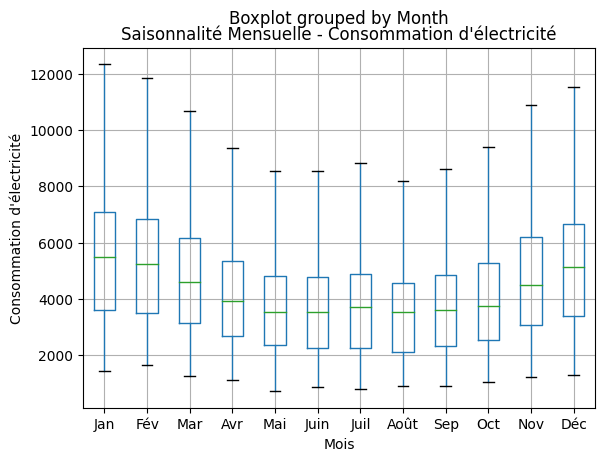

In [26]:
# Extraire les mois comme une colonne dans le DataFrame
df['Month'] = df.index.month

# Créez une figure pour le graphique de boîtes à moustaches
plt.figure(figsize=(16, 6))  # Ajustez la largeur (16) selon vos besoins

# Créez le graphique de boîtes à moustaches pour chaque mois
df.boxplot(column='consommation_brute_electricite_rte', by='Month', showfliers=False)
plt.title('Saisonnalité Mensuelle - Consommation d\'électricité')
plt.xlabel('Mois')
plt.ylabel('Consommation d\'électricité')

# Définissez les étiquettes de l'axe x pour correspondre aux mois
months = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
plt.xticks(range(1, 13), months)

# Affichez le graphique
plt.show()


    Saisonnalité :
        Si les médianes des boîtes (lignes épaisses à l'intérieur des boîtes) varient considérablement d'une période à l'autre (trimestre, mois, semaine, jour), cela suggère une saisonnalité dans les données. Par exemple, si la médiane est plus élevée en hiver qu'en été, cela indique une saisonnalité saisonnière.

    Variabilité :
        L'étendue des boîtes (distance entre le premier quartile - Q1 - et le troisième quartile - Q3) reflète la variabilité des données. Si la boîte est étendue, cela signifie que les données sont dispersées sur une large gamme. Si la boîte est étroite, cela signifie que les données sont plus concentrées autour de la médiane.

    Valeurs aberrantes :
        Les points situés en dehors des "moustaches" des box-plots (généralement définies comme 1,5 fois l'étendue interquartile) sont considérés comme des valeurs aberrantes. Vous pouvez repérer ces valeurs qui se trouvent au-delà des moustaches et les examiner plus en détail.

    Tendances :
        Les box-plots montrent également les tendances centrales (médiane) et les valeurs extrêmes (points situés en dehors des moustaches) pour chaque période. Cela vous permet de détecter des tendances à la hausse ou à la baisse dans la consommation d'électricité.

    Comparaisons :
        Vous pouvez comparer les box-plots de différentes périodes pour identifier les variations saisonnières. Par exemple, si la consommation d'électricité est généralement plus élevée les mois d'hiver que les mois d'été, cela indique une saisonnalité hivernale.

<Figure size 1600x600 with 0 Axes>

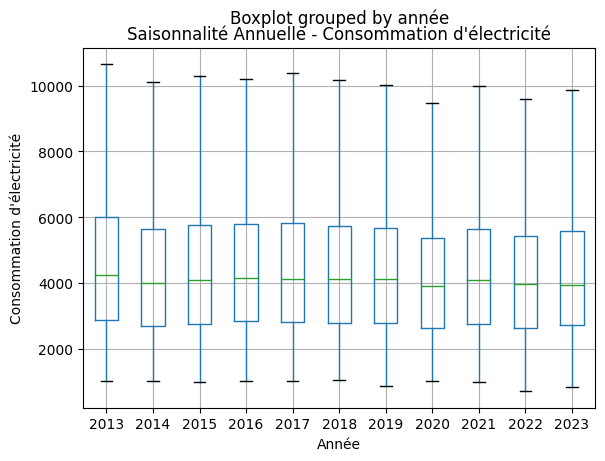

In [40]:
# Créez une nouvelle colonne 'année' en extrayant l'année de la colonne de date
df['année'] = df.index.year

# Créez une figure pour le graphique de boîtes à moustaches
plt.figure(figsize=(16, 6))

# Créez le graphique de boîtes à moustaches pour chaque année
df.boxplot(column='consommation_brute_electricite_rte', by='année', showfliers=False)
plt.title('Saisonnalité Annuelle - Consommation d\'électricité')
plt.xlabel('Année')
plt.ylabel('Consommation d\'électricité')

# Affichez le graphique
plt.show()

<Figure size 2500x1500 with 0 Axes>

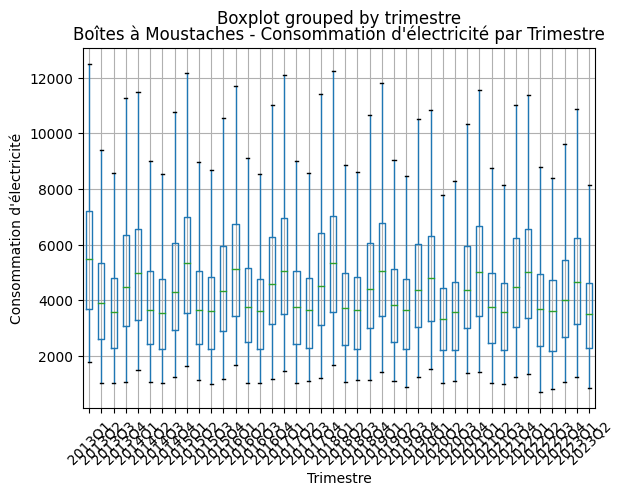

In [27]:
# Créez une nouvelle colonne 'trimestre' en extrayant le trimestre de la colonne de date
df['trimestre'] = df.index.to_period('Q')

# Créez le graphique de boîtes à moustaches par trimestre
plt.figure(figsize=(25, 15))
df.boxplot(column='consommation_brute_electricite_rte', by='trimestre', showfliers=False)
plt.title('Boîtes à Moustaches - Consommation d\'électricité par Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Consommation d\'électricité')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_14640/1229313979.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['semaine'] = df.index.week


<Figure size 1600x600 with 0 Axes>

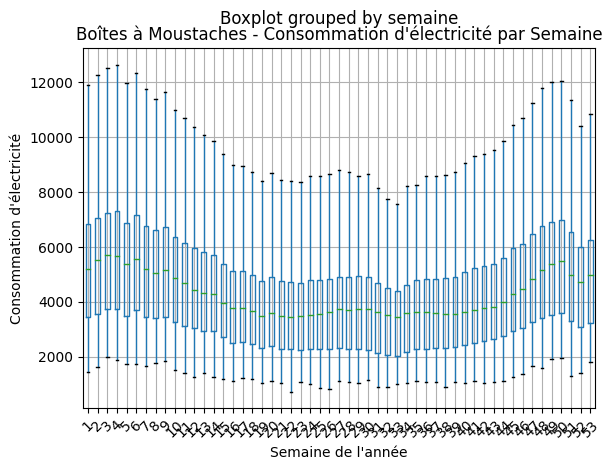

In [28]:
# Créez une nouvelle colonne 'semaine' en extrayant la semaine de l'année de la colonne de date
df['semaine'] = df.index.week

# Créez le graphique de boîtes à moustaches par semaine
plt.figure(figsize=(16, 6))
df.boxplot(column='consommation_brute_electricite_rte', by='semaine', showfliers=False)
plt.title('Boîtes à Moustaches - Consommation d\'électricité par Semaine')
plt.xlabel('Semaine de l\'année')
plt.ylabel('Consommation d\'électricité')
plt.xticks(rotation=45)
plt.show()

<Figure size 1600x600 with 0 Axes>

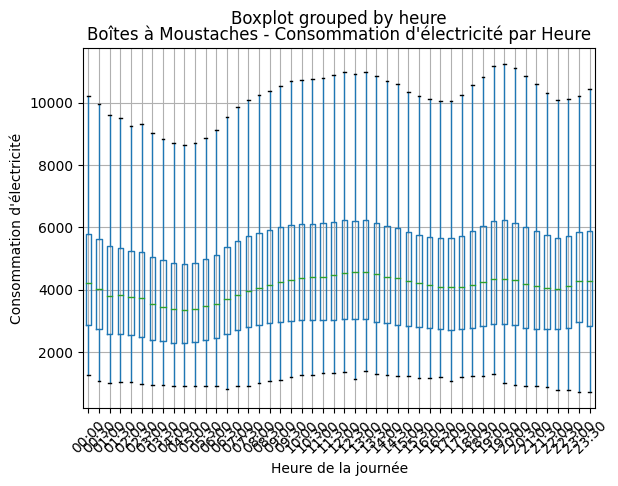

In [29]:
# Créez le graphique de boîtes à moustaches par heure
plt.figure(figsize=(16, 6))
df.boxplot(column='consommation_brute_electricite_rte', by='heure', showfliers=False)
plt.title('Boîtes à Moustaches - Consommation d\'électricité par Heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Consommation d\'électricité')
plt.xticks(rotation=45)
plt.show()

### 6) Qu’est ce que la stationnarité? 

La stationnarité est une propriété importante des séries temporelles, qui signifie essentiellement que les caractéristiques statistiques de la série ne changent pas avec le temps. En d'autres termes, la stationnarité suppose que la moyenne, la variance et la structure de corrélation de la série restent constantes sur toute la période d'observation.

Visuellement, une série temporelle stationnaire serait une série dont les caractéristiques (moyenne, variance, etc.) semblent rester relativement constantes au fil du temps, sans tendance apparente ou saisonnalité significative. Une série non stationnaire, en revanche, montrerait des tendances ou des motifs saisonniers clairs.

### 7) Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire? 


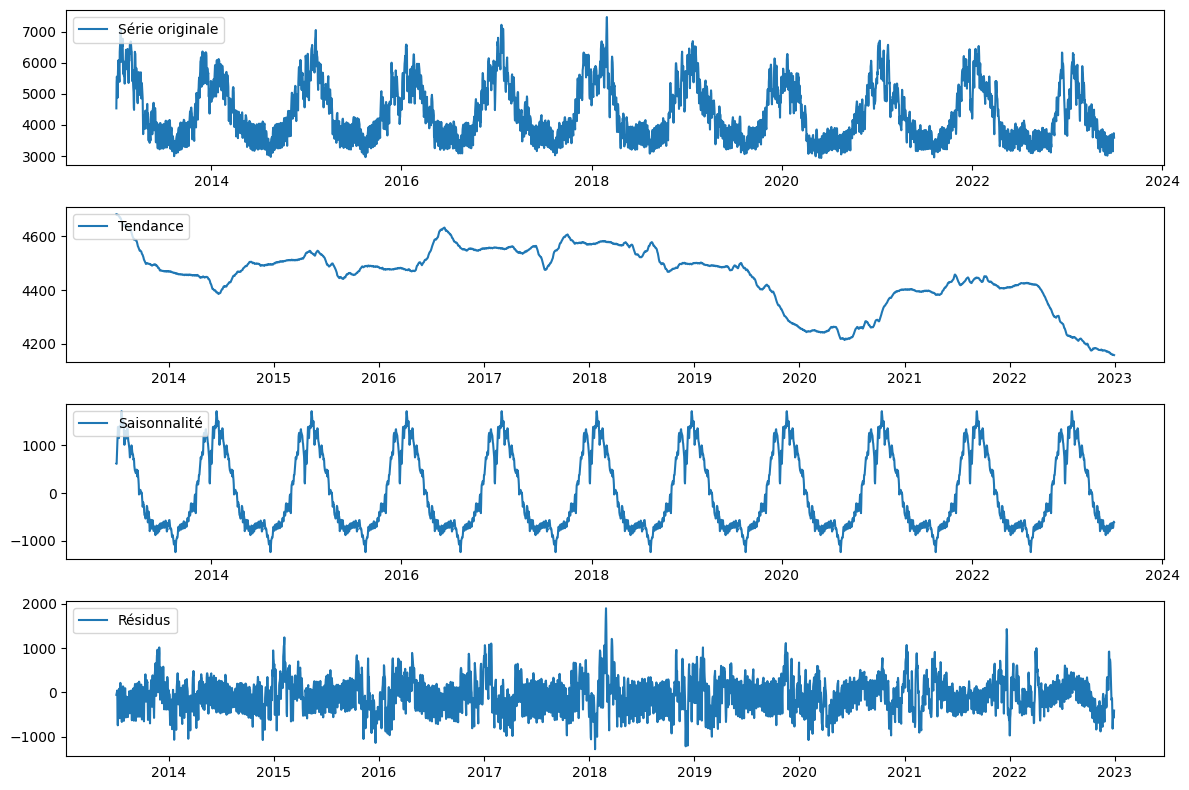

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Définir la fréquence d'échantillonnage par jour
daily_data = df_avg_by_day.set_index('jour')

# Appliquer la décomposition saisonnière
decomposition = sm.tsa.seasonal_decompose(daily_data, model='additive', period=365)

# Obtenez les composantes
tendance = decomposition.trend
saisonnalite = decomposition.seasonal
residus = decomposition.resid

# Afficher les composantes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(daily_data, label='Série originale')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(tendance, label='Tendance')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(saisonnalite, label='Saisonnalité')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residus, label='Résidus')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### 8) Réalisez un test de Dickey Fuller, quelle est l’hypothèse nulle et l’hypothèse alternative, quelle est la statistique calculée et quelle distribution théorique suit elle d’après l’hypothèse nulle. Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne un valeur aussi extrême voir plus extrême? 

Le test de Dickey-Fuller Augmenté (ADF) est un test statistique utilisé pour déterminer si une série temporelle est stationnaire ou non. Voici les hypothèses du test de Dickey-Fuller :

Hypothèse Nulle (H0) : L'hypothèse nulle suppose que la série temporelle possède une racine unitaire, ce qui signifie qu'elle n'est pas stationnaire. En d'autres termes, la série temporelle présente une structure temporelle qui évolue au fil du temps.

Hypothèse Alternative (H1) : L'hypothèse alternative suppose que la série temporelle ne possède pas de racine unitaire, ce qui signifie qu'elle est stationnaire. En d'autres termes, la série temporelle ne présente pas de tendance ou de structure temporelle significative.

La statistique calculée dans le test de Dickey-Fuller est appelée la statistique de test de Dickey-Fuller (ADF). Cette statistique est comparée à une distribution de référence sous l'hypothèse nulle.

Si la statistique ADF est inférieure aux valeurs critiques (ou si la p-value associée est suffisamment faible), cela signifie que nous pouvons rejeter l'hypothèse nulle, ce qui suggère que la série temporelle est stationnaire. Si la statistique ADF est supérieure aux valeurs critiques (ou si la p-value est élevée), nous ne pouvons pas rejeter l'hypothèse nulle, ce qui suggère que la série temporelle n'est pas stationnaire.

La probabilité que la statistique ADF sous l'hypothèse nulle prenne une valeur aussi extrême ou plus extrême est la p-value. Plus la p-value est faible, plus il est probable que la série temporelle soit stationnaire.

In [31]:
serie_temporelle = daily_data

In [33]:
from statsmodels.tsa.stattools import adfuller


# Effectuer le test de Dickey-Fuller
result = adfuller(serie_temporelle, autolag='AIC')


# Extraire les résultats du test
adf_statistique = result[0]
p_valeur = result[1]
valeurs_critiques = result[4]

# Afficher les résultats
print(f'Statistique ADF : {adf_statistique}')
print(f'P-valeur : {p_valeur}')
print('Valeurs critiques :')
for key, value in valeurs_critiques.items():
    print(f'    {key}: {value}')

# Interpréter les résultats
if p_valeur <= 0.05:
    print("La série temporelle est stationnaire (rejette l'hypothèse nulle)")
else:
    print("La série temporelle n'est pas stationnaire (ne rejette pas l'hypothèse nulle)")

Statistique ADF : -4.394594222469944
P-valeur : 0.00030344010019686316
Valeurs critiques :
    1%: -3.4320711258652885
    5%: -2.862300498788623
    10%: -2.5671748234670364
La série temporelle est stationnaire (rejette l'hypothèse nulle)


### 9) Même consigne pour le test de KPSS

In [34]:
from statsmodels.tsa.stattools import kpss

# Effectuez le test KPSS
result = kpss(serie_temporelle, regression='c')

# Extrayez les statistiques de test et les valeurs critiques
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

# Affichez les résultats du test
print("Statistique de test KPSS :", kpss_statistic)
print("Valeur p du test KPSS :", p_value)
print("Valeurs critiques du test KPSS :", critical_values)

# Interprétation du test KPSS
if p_value < 0.05:
    print("La série n'est pas stationnaire autour d'une tendance déterministe (rejeter l'hypothèse nulle)")
else:
    print("La série est stationnaire autour d'une tendance déterministe (ne pas rejeter l'hypothèse nulle)")


Statistique de test KPSS : 0.20172921113299294
Valeur p du test KPSS : 0.1
Valeurs critiques du test KPSS : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La série est stationnaire autour d'une tendance déterministe (ne pas rejeter l'hypothèse nulle)


/tmp/ipykernel_14640/2468826990.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(serie_temporelle, regression='c')


### 10) Désaisonnalisez la composante annuelle de votre time série est utilisez à nouveau le test de Dickey Fuller. Que comprenez vous de ce résultat?

In [35]:

# Appliquez une moyenne mobile annuelle (365 jours) pour lisser la saisonnalité
window = 365
serie_temporelle_lissee = serie_temporelle - serie_temporelle.rolling(window=window, min_periods=1, center=True).mean()

### 11) Sur la time serie désaisonnalisée, réalisez à nouveau un test de KPSS. Que peut-on en conclure?

In [36]:

# Effectuez le test de Dickey-Fuller sur la série temporelle désaisonnalisée
result = adfuller(serie_temporelle_lissee.dropna())

# Extrayez la statistique de test et la valeur p
adf_statistic = result[0]
p_value = result[1]

# Affichez les résultats du test
print("Statistique de test de Dickey-Fuller :", adf_statistic)
print("Valeur p du test de Dickey-Fuller :", p_value)

# Interprétation du test de Dickey-Fuller
if p_value < 0.05:
    print("La série désaisonnalisée est stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série désaisonnalisée n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)")

Statistique de test de Dickey-Fuller : -4.420780785374608
Valeur p du test de Dickey-Fuller : 0.0002726803766069549
La série désaisonnalisée est stationnaire (rejeter l'hypothèse nulle)
